In [1]:
### Importing neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
### For model creation and model tuning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_csv('data/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### In the dataset, the following columns are present
1. Car_name : The name of the Car.
2. Year: Year in which the car was bought.
3. Selling_Price: The output feature.
4. Present_Price: The current showroom price of the car.
5. Kms_Driven: The No.of kilometers driven in the car.
6. Fuel_Type: Type of fuel the car runs on.
7. Seller_Type: Dealer or Individual.
8. Transmission: Automatic car or Manual car.
9. Owner: The No.of previous owners for the car.

### Since the name of the car doesn't have any effect on the car price, We can drop that column

In [8]:
data.drop(['Car_Name'],axis=1,inplace=True)

In [9]:
### Check for missing values
data.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
### Now we need to convert categorical features into numeric features
categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]

In [25]:
for feature in categorical_features:
    print("The {} column has {} unique values.".format(feature,data['Fuel_Type'].unique().size))

The Fuel_Type column has 3 unique values.
The Seller_Type column has 3 unique values.
The Transmission column has 3 unique values.


### We can use One hot encoding to replace the categorical features. Because the No.of unique values are less so the dimensionality of the dataset won't increase much

In [26]:
data = pd.get_dummies(data,drop_first=True)

In [28]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


### The Year column has to be converted into the no.of years it has been since the car was bought.

In [30]:
data['Current_Year'] = 2022

In [31]:
data['No_of_years'] = data['Current_Year'] - data['Year']

In [32]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Current_Year,No_of_years
0,2014,3.35,5.59,27000,0,0,1,0,1,2022,8
1,2013,4.75,9.54,43000,0,1,0,0,1,2022,9
2,2017,7.25,9.85,6900,0,0,1,0,1,2022,5
3,2011,2.85,4.15,5200,0,0,1,0,1,2022,11
4,2014,4.60,6.87,42450,0,1,0,0,1,2022,8


### Now we can drop the Years and Current_Year Column

In [33]:
data.drop(['Year','Current_Year'],axis=1,inplace=True)

In [34]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_years
0,3.35,5.59,27000,0,0,1,0,1,8
1,4.75,9.54,43000,0,1,0,0,1,9
2,7.25,9.85,6900,0,0,1,0,1,5
3,2.85,4.15,5200,0,0,1,0,1,11
4,4.60,6.87,42450,0,1,0,0,1,8


## Data Visualization

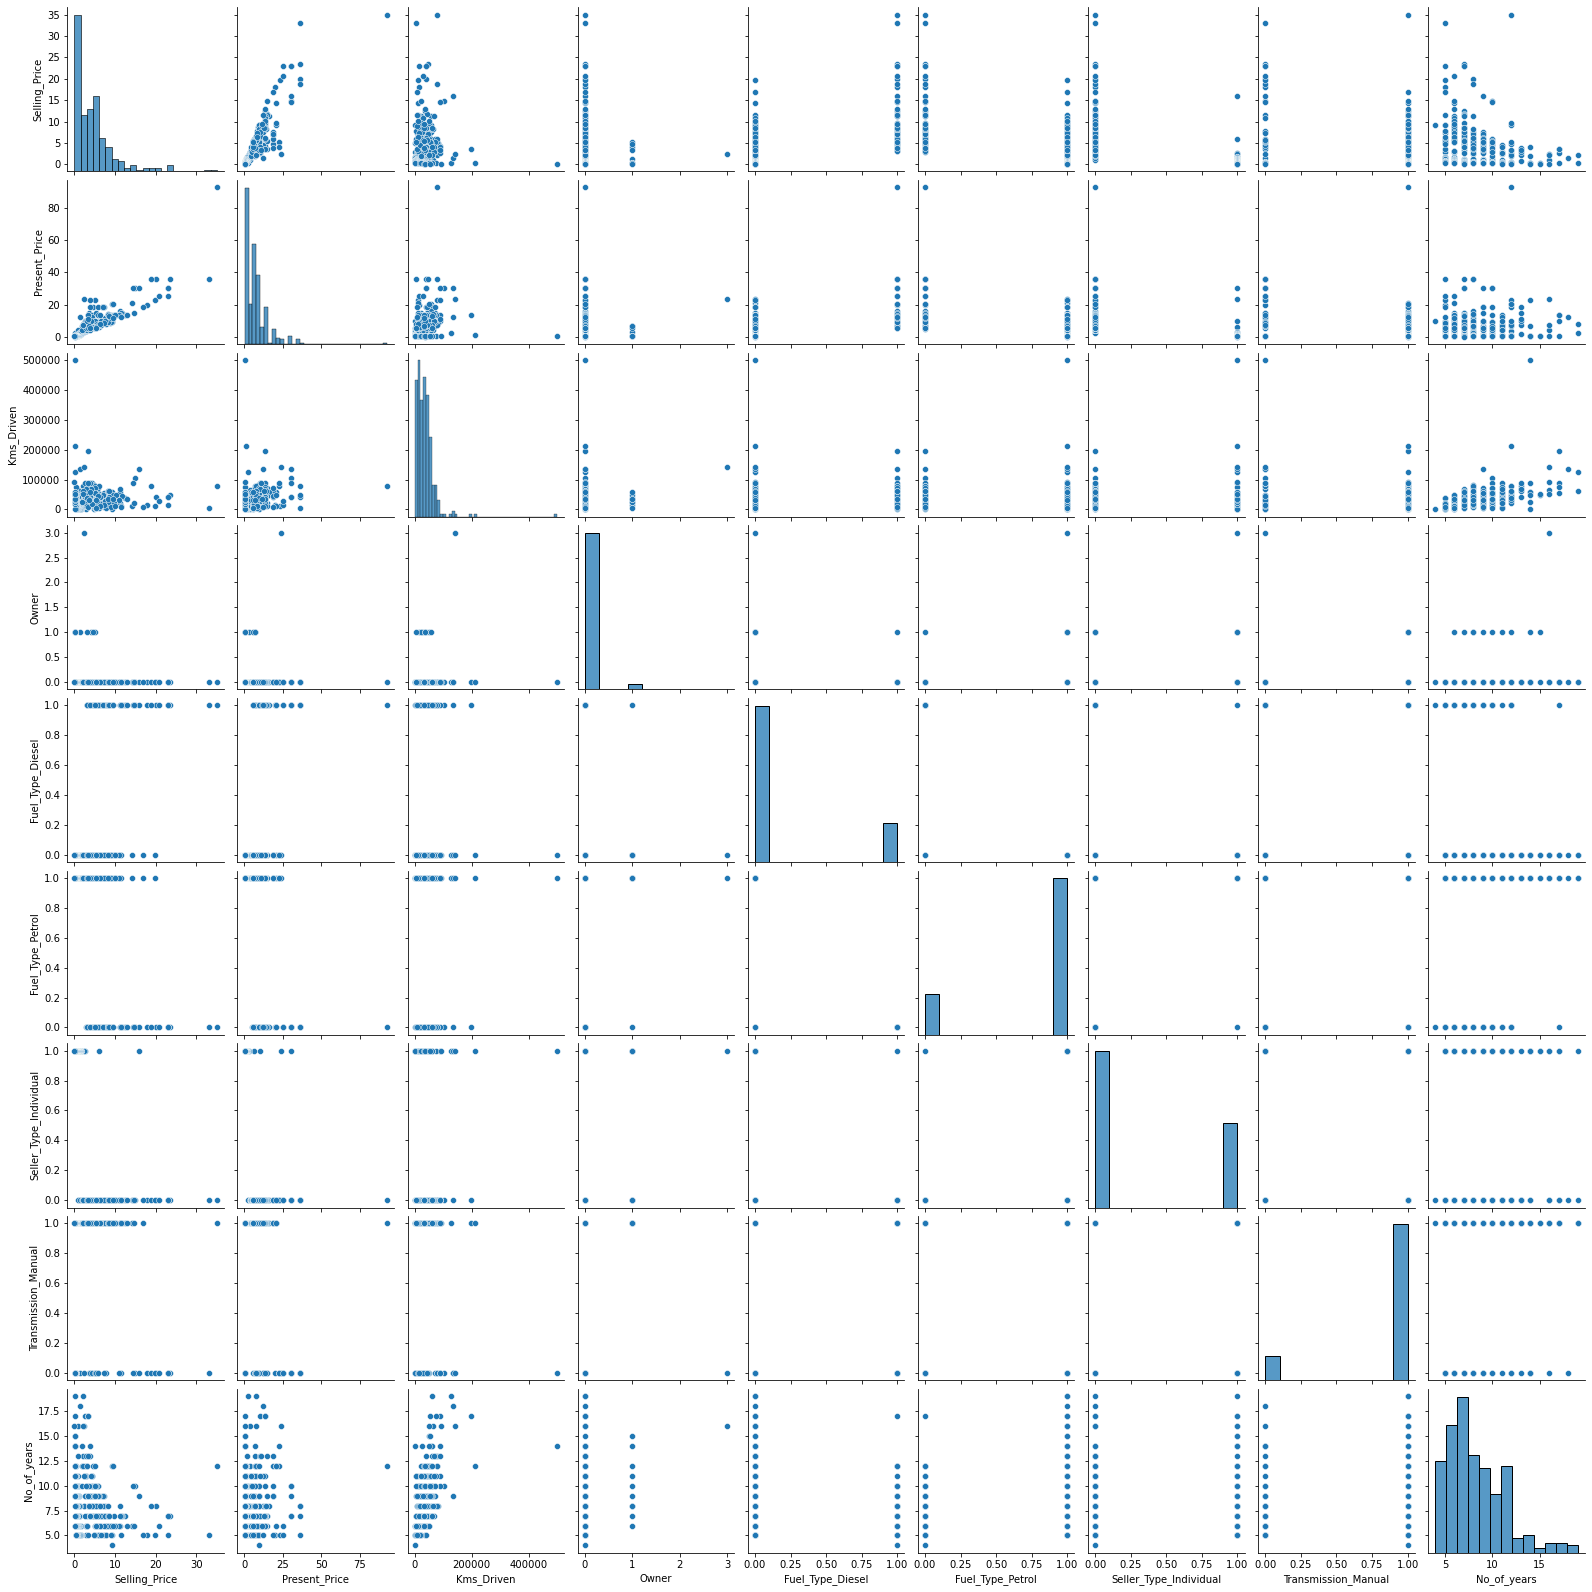

In [35]:
### Pariplot helps us to Visualize the relationship between different features
sns.pairplot(data)

### But in this dataset, Pariplot didn't prove much useful. So we can use heatmap from seaborn to examine the correlation

In [36]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,No_of_years
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316,0.182104
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643,-0.064315
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013,0.059959
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240,0.039896
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000,-0.000394
No_of_years,-0.236141,0.047584,0.524342,0.182104,-0.064315,0.059959,0.039896,-0.000394,1.000000


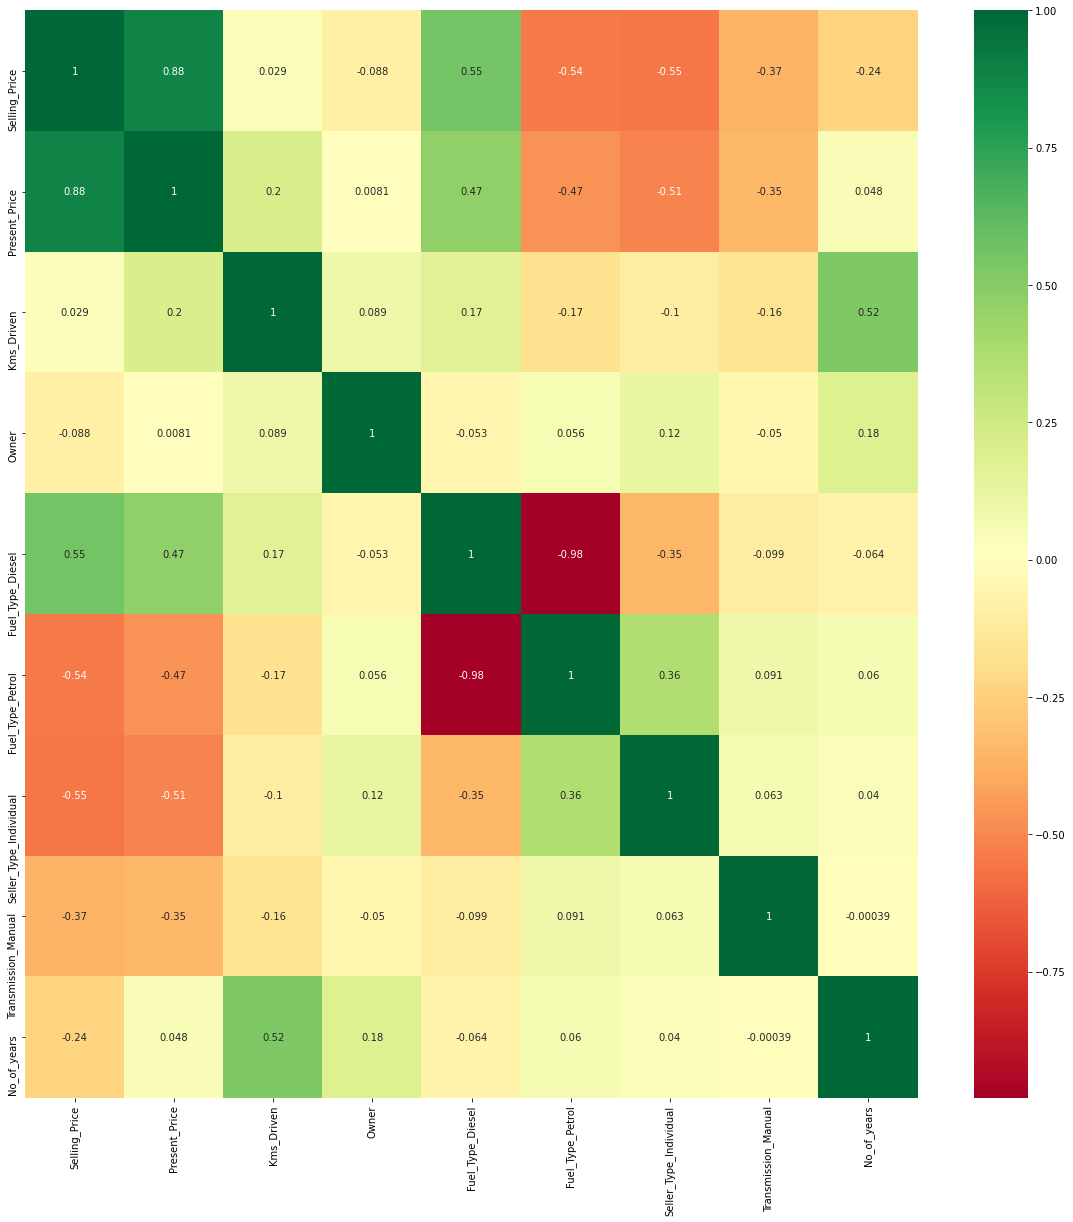

In [37]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
heat= sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### From the heatmap we can observe that Fuel_Type_Diesel Has a Positive Correlation with Selling Price

## Model Creation

In [39]:
### Seperating independent and dependent features
X = data.iloc[:,1:]
Y = data.iloc[:,0]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [41]:
### Initializing RandomForestRegressor
rf_random = RandomForestRegressor()

In [42]:
### Hyperparameters
### Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start =100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [43]:
random_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [44]:
rf = RandomForestRegressor()

In [45]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
predictions = rf_random.predict(X_test)

In [48]:
predictions

array([21.91440634,  7.26337388,  2.83551479,  7.42882169,  7.53199219,
        0.22847053,  6.86553243,  2.85633206,  1.14926422,  7.87688387,
        0.5439343 ,  2.84876792,  0.6171651 , 22.09042597,  0.35117033,
        0.64959809,  2.86778418,  0.38452004,  7.71114373, 10.13750952,
        7.48501615,  5.49191593,  2.79721449,  0.58956387,  4.87228369,
        1.13806336,  4.50316605,  9.95792074,  0.43688521,  3.65450719,
        2.87951813,  8.70760757,  3.80769454,  0.84950911,  0.48141246,
        1.1568992 ,  4.65353188,  4.70064452,  7.34810776,  2.80466205,
        0.41664553,  5.34162685,  4.52286528,  4.25019647,  0.2893853 ,
       10.72831164,  6.86999677,  0.42628312,  0.60923262,  0.71446062,
        1.33945879,  4.98047836,  0.2670618 ,  5.31754265,  2.71744116,
        3.53462567,  5.14758854,  0.36288138, 21.88644932,  5.56549686,
        7.8055328 ])

D:\SD\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

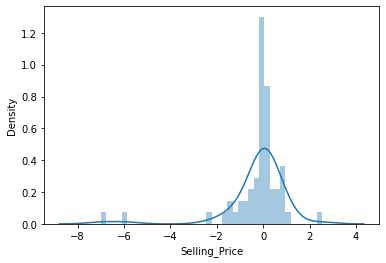

In [49]:
sns.distplot(y_test-predictions)

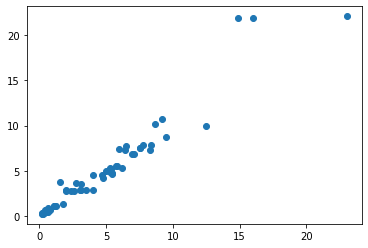

In [50]:
plt.scatter(y_test,predictions)

In [51]:
rf_random.score(X_test,y_test)

-1.8783987015197863

In [52]:
file = open('random_forest_regression_model.pkl','wb')

pickle.dump(rf_random,file)